<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-24 15:09:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  58.7MB/s    in 3.4s    

2025-09-24 15:09:05 (59.0 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [26]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


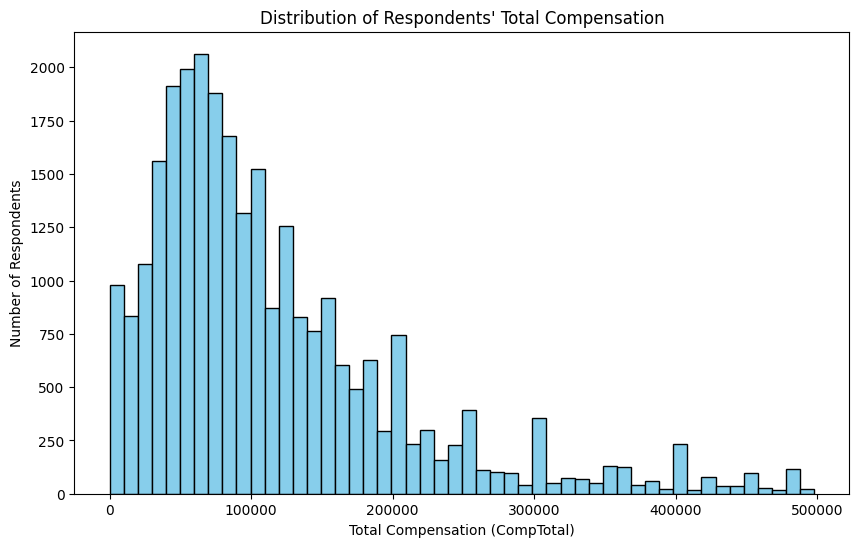

In [9]:
## Write your code here
# fetch CompTotal column
query = "SELECT CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# clean data: drop NaN
comp = df["CompTotal"].dropna()

# optional: filter out very large outliers
comp = comp[comp < 500000]

# histogram
plt.figure(figsize=(10,6))
plt.hist(comp, bins=50, color="skyblue", edgecolor="black")

plt.xlabel("Total Compensation (CompTotal)")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Respondents' Total Compensation")
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


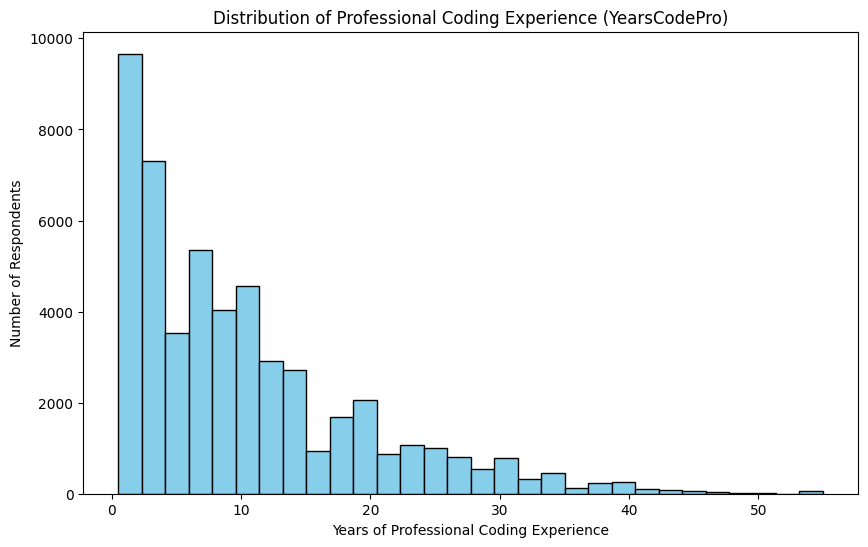

In [10]:
## Write your code here

# fetch YearsCodePro column
query = "SELECT YearsCodePro FROM main"
df = pd.read_sql_query(query, conn)

# clean and convert YearsCodePro to numeric
def convert_years(val):
    if pd.isna(val):
        return None
    elif val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 55   # assign a numeric upper bound
    else:
        try:
            return float(val)
        except:
            return None

df["YearsCodeProNum"] = df["YearsCodePro"].apply(convert_years)

# drop NaN
years = df["YearsCodeProNum"].dropna()

# histogram
plt.figure(figsize=(10,6))
plt.hist(years, bins=30, color="skyblue", edgecolor="black")

plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Professional Coding Experience (YearsCodePro)")
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


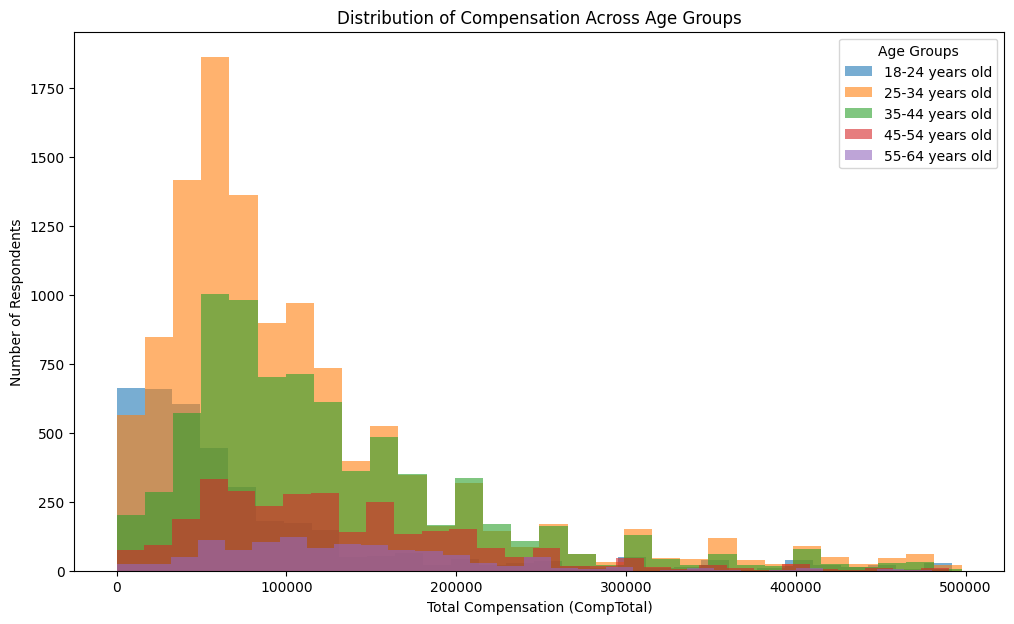

In [11]:
## Write your code here
# fetch Age and CompTotal
query = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# drop rows with missing values
df = df.dropna(subset=["Age", "CompTotal"])

# keep only reasonable comp values (to remove extreme outliers)
df = df[df["CompTotal"] < 500000]  # cap at 500k

# define some age groups to compare
age_groups = [
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old"
]

# filter only selected groups
df = df[df["Age"].isin(age_groups)]

# plot histograms by Age groups
plt.figure(figsize=(12,7))
for age in age_groups:
    subset = df[df["Age"] == age]["CompTotal"]
    plt.hist(subset, bins=30, alpha=0.6, label=age)

plt.xlabel("Total Compensation (CompTotal)")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Compensation Across Age Groups")
plt.legend(title="Age Groups")
plt.show()



**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


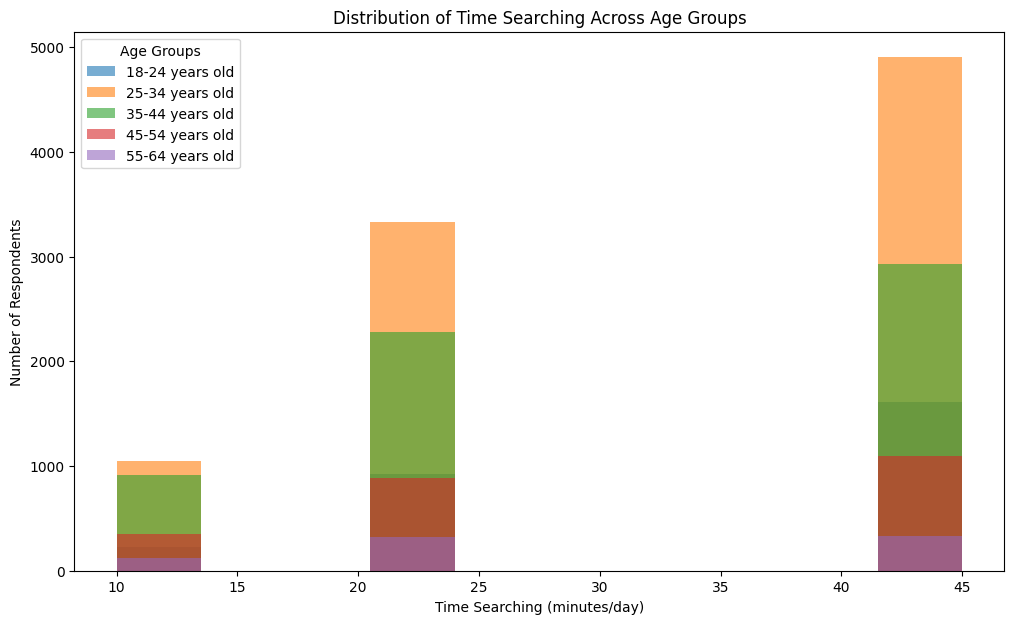

In [12]:
## Write your code here
# fetch Age and TimeSearching
query = "SELECT Age, TimeSearching FROM main"
df = pd.read_sql_query(query, conn)

# drop rows with missing values
df = df.dropna(subset=["Age", "TimeSearching"])

# map TimeSearching to numeric minutes
time_map = {
    "Less than 15 minutes a day": 10,
    "15-30 minutes a day": 22,
    "30-60 minutes a day": 45,
    "1-2 hours a day": 90,
    "2+ hours a day": 150
}
df["TimeSearchingNum"] = df["TimeSearching"].map(time_map)

# define age groups
age_groups = [
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old"
]

df = df[df["Age"].isin(age_groups)]

# plot histograms by age group
plt.figure(figsize=(12,7))
for age in age_groups:
    subset = df[df["Age"] == age]["TimeSearchingNum"]
    plt.hist(subset, bins=10, alpha=0.6, label=age)

plt.xlabel("Time Searching (minutes/day)")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Time Searching Across Age Groups")
plt.legend(title="Age Groups")
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


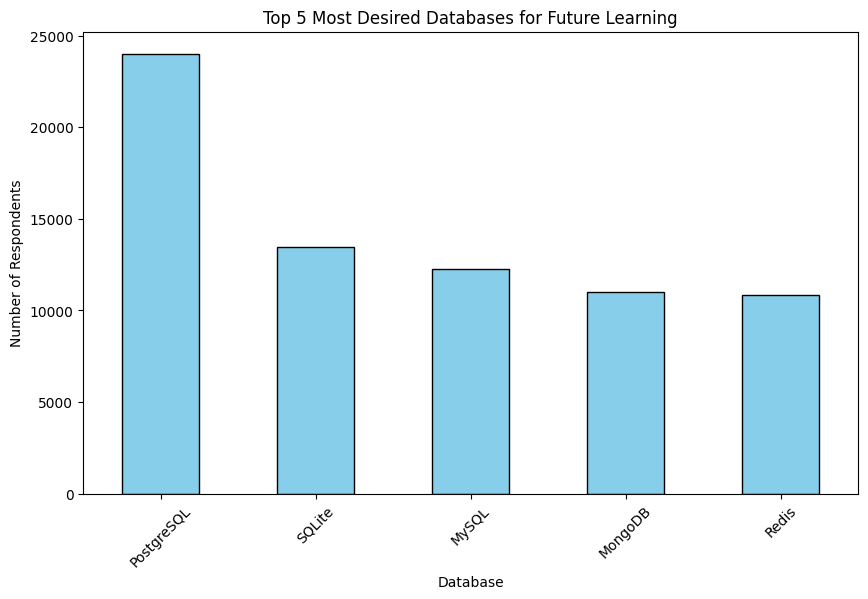

In [16]:
## Write your code here
# fetch database column
query = "SELECT DatabaseWantToWorkWith FROM main"
df = pd.read_sql_query(query, conn)

# drop missing values
df = df.dropna(subset=["DatabaseWantToWorkWith"])

# split multiple responses (if separated by ;)
all_dbs = df["DatabaseWantToWorkWith"].str.split(";")

# flatten into one list
db_list = [db.strip() for sublist in all_dbs for db in sublist]

# count frequency
db_counts = pd.Series(db_list).value_counts().head(5)

# plot histogram
plt.figure(figsize=(10,6))
db_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.title("Top 5 Most Desired Databases for Future Learning")
plt.xticks(rotation=45)
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


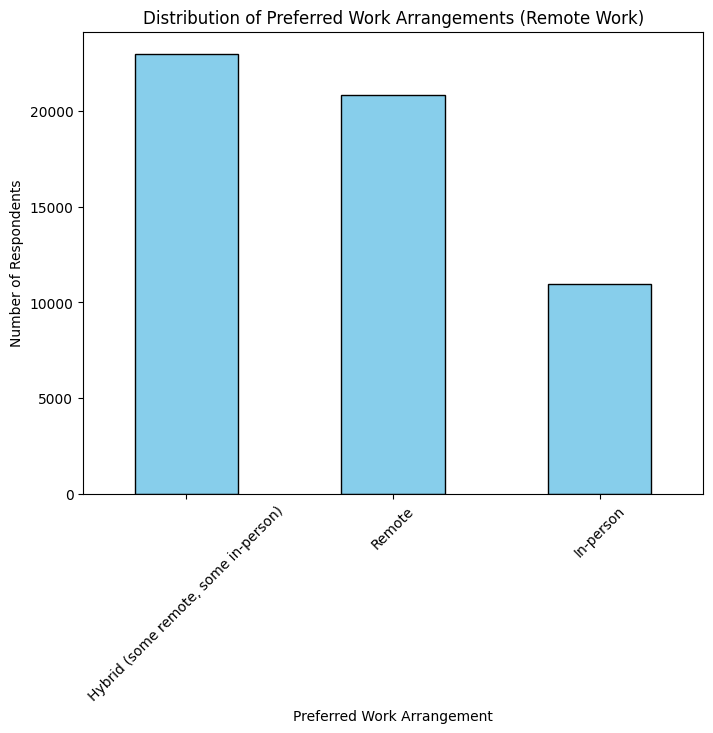

In [18]:
## Write your code here
# fetch remote work preferences
query = "SELECT RemoteWork FROM main"
df = pd.read_sql_query(query, conn)

# drop missing values
df = df.dropna(subset=["RemoteWork"])

# count frequency
remote_counts = df["RemoteWork"].value_counts()

# plot histogram (bar style)
plt.figure(figsize=(8,6))
remote_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Preferred Work Arrangement")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Preferred Work Arrangements (Remote Work)")
plt.xticks(rotation=45)
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


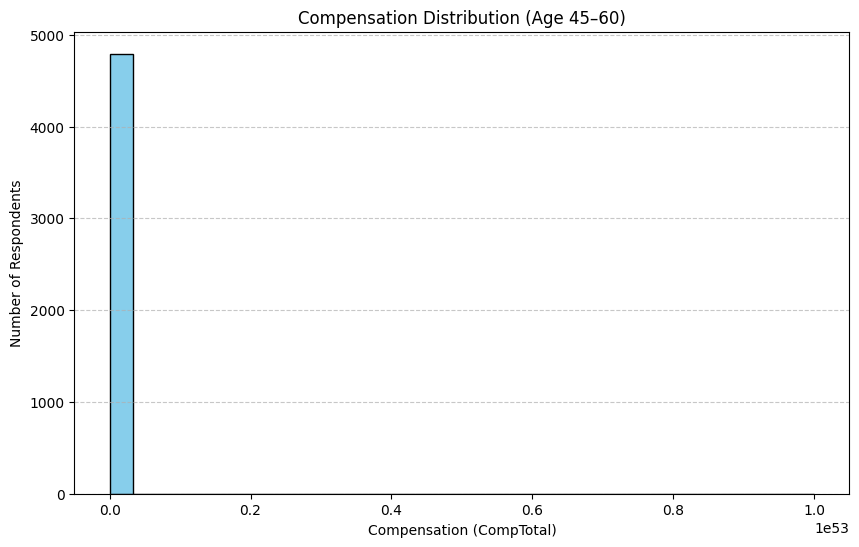

In [22]:
## Write your code here
# fetch needed columns
query = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# map age to numeric midpoint for filtering
age_map = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 29,
    "30-34 years old": 32,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 70
}
df["AgeNum"] = df["Age"].map(age_map)

# filter respondents aged 45 to 60
df_filtered = df[(df["AgeNum"] >= 45) & (df["AgeNum"] <= 60)]

# drop missing values and convert CompTotal to numeric
df_filtered.loc[:, "CompTotal"] = pd.to_numeric(df_filtered["CompTotal"], errors="coerce")
df_filtered = df_filtered.dropna(subset=["CompTotal"])

# plot histogram
plt.figure(figsize=(10,6))
plt.hist(df_filtered["CompTotal"], bins=30, color="skyblue", edgecolor="black")

plt.xlabel("Compensation (CompTotal)")
plt.ylabel("Number of Respondents")
plt.title("Compensation Distribution (Age 45–60)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


<Figure size 1200x600 with 0 Axes>

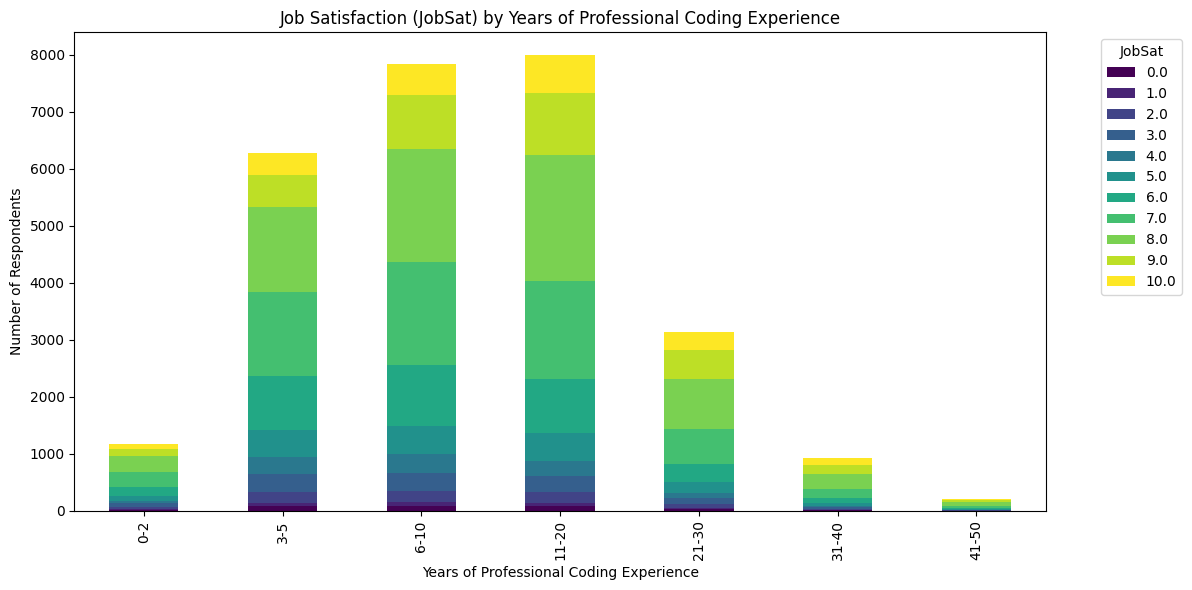

In [28]:
## Write your code here
#query required columns
query = "SELECT YearsCodePro, JobSat FROM main"
df = pd.read_sql_query(query, conn)

# clean YearsCodePro (convert to numeric where possible)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# drop missing values
df = df.dropna(subset=["YearsCodePro", "JobSat"])

# bucket YearsCodePro for easier visualization
bins = [0, 2, 5, 10, 20, 30, 40, 50]
labels = ["0-2", "3-5", "6-10", "11-20", "21-30", "31-40", "41-50"]
df["ExperienceBin"] = pd.cut(df["YearsCodePro"], bins=bins, labels=labels, right=False)

# plot histogram of JobSat by coding experience bins
plt.figure(figsize=(12,6))
df.groupby("ExperienceBin", observed=True)["JobSat"].value_counts().unstack().plot(
    kind="bar", stacked=True, figsize=(12,6), colormap="viridis"
)

plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Number of Respondents")
plt.title("Job Satisfaction (JobSat) by Years of Professional Coding Experience")
plt.legend(title="JobSat", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [29]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
